# File for testing on the datasets

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
import seaborn as sns

%matplotlib inline

Retrive dataset

In [31]:
complete_no_SF = pd.read_csv("Complete_dataset_without_SF2.csv")
complete_no_SF.describe()

,Oxygen,Drug,Drug conc,Dose,#Plated,PE,#Counted
count,1236.0,0.0,0.0,1236.000000,1236.000000,1236.000000,1228.000000
mean,21.0,NaN,NaN,3.648932,6793.106796,0.307294,34.537459
std,0.0,NaN,NaN,2.763909,8032.454648,0.173668,28.157597
min,21.0,NaN,NaN,0.000000,100.000000,0.040800,0.000000
25%,21.0,NaN,NaN,1.000000,500.000000,0.205000,10.000000
50%,21.0,NaN,NaN,3.030000,2000.000000,0.310000,28.000000
75%,21.0,NaN,NaN,6.000000,10000.000000,0.412000,53.000000
max,21.0,NaN,NaN,10.900000,20000.000000,0.710000,124.000000


Imported full dataset, will now remove zero variance columns (Radiation Type, Oxygen, Drug, Drug conc)

In [3]:
complete_no_SF_drop_col = complete_no_SF.drop(['Radiation Type', 'Oxygen', 'Drug', 'Drug conc'], 1)
complete_no_SF_drop_col.head(10)

,Cell Line,Dose Rate,Dose,#Plated,PE,#Counted
0,FIB10,HDR,0.00,200,0.0883,18.0
1,FIB10,HDR,0.00,200,0.0883,16.0
2,FIB10,HDR,0.00,200,0.0883,19.0
3,FIB10,HDR,0.00,200,0.0883,28.0
4,FIB10,HDR,0.00,200,0.0883,23.0
5,FIB10,HDR,0.00,200,0.0883,16.0
6,FIB10,HDR,0.00,200,0.0883,23.0
7,FIB10,HDR,0.00,200,0.0883,19.0
8,FIB10,HDR,0.00,200,0.0883,19.0
9,FIB10,HDR,0.96,500,0.0883,28.0


Generating SF values

In [4]:
complete_dataset_with_SF = complete_no_SF_drop_col
complete_dataset_with_SF['SF'] = complete_dataset_with_SF.loc[:, "#Counted"] / (complete_dataset_with_SF.loc[:, 'PE'] * complete_dataset_with_SF.loc[:, "#Plated"])
complete_dataset_with_SF.head(10)
complete_dataset_with_SF.to_csv("complete_dataset_with_SF2.csv")

Producing seperate dataframes for each cell line so I can produce graphs

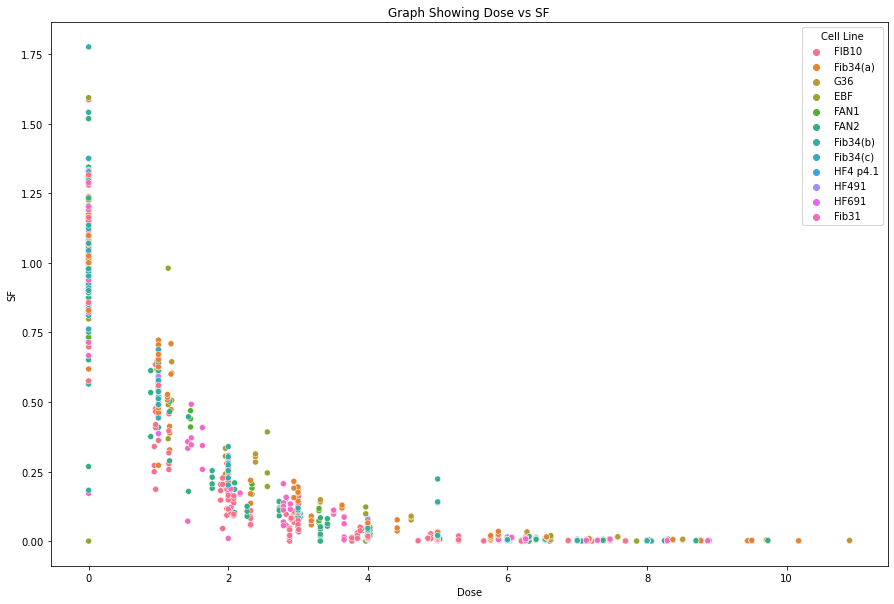

In [5]:
FIB10_data = complete_dataset_with_SF.loc[complete_dataset_with_SF['Cell Line'] == 'FIB10']
Fib34a_data = complete_dataset_with_SF.loc[complete_dataset_with_SF['Cell Line'] == 'Fib34(a)']
Fib34b_data = complete_dataset_with_SF.loc[complete_dataset_with_SF['Cell Line'] == 'Fib34(b)']
Fib34c_data = complete_dataset_with_SF.loc[complete_dataset_with_SF['Cell Line'] == 'Fib34(c)']
FAN1_data = complete_dataset_with_SF.loc[complete_dataset_with_SF['Cell Line'] == 'FAN1']
FAN2_data = complete_dataset_with_SF.loc[complete_dataset_with_SF['Cell Line'] == 'FAN2']
G36_data = complete_dataset_with_SF.loc[complete_dataset_with_SF['Cell Line'] == 'G36']
EBF_data = complete_dataset_with_SF.loc[complete_dataset_with_SF['Cell Line'] == 'EBF']
HF4p4_1_data = complete_dataset_with_SF.loc[complete_dataset_with_SF['Cell Line'] == 'HF4 p4.1']
HF491_data = complete_dataset_with_SF.loc[complete_dataset_with_SF['Cell Line'] == 'HF491']
HF691_data = complete_dataset_with_SF.loc[complete_dataset_with_SF['Cell Line'] == 'HF691']
fib31_data = complete_dataset_with_SF.loc[complete_dataset_with_SF['Cell Line'] == 'Fib31']
graph = plt.gcf()
graph.set_size_inches(15,10)
graph = sns.scatterplot(x='Dose', y='SF', data=complete_dataset_with_SF, hue='Cell Line').set(title='Graph Showing Dose vs SF')

Generating histogram to show distribution of controls

In [9]:
controls = complete_dataset_with_SF[complete_dataset_with_SF['Dose'] == 0]
controls2 = controls.drop(['#Plated', 'PE', '#Counted', 'Dose Rate'], axis=1)
controls2

,Cell Line,Dose,SF
0,FIB10,0.0,1.019253
1,FIB10,0.0,0.906002
2,FIB10,0.0,1.075878
3,FIB10,0.0,1.585504
4,FIB10,0.0,1.302378
...,...,...,...
1207,Fib34(b),0.0,0.965301
1208,Fib34(b),0.0,0.978346
1209,Fib34(b),0.0,0.952257
1210,Fib34(b),0.0,1.069658


<AxesSubplot:xlabel='SF', ylabel='Count'>

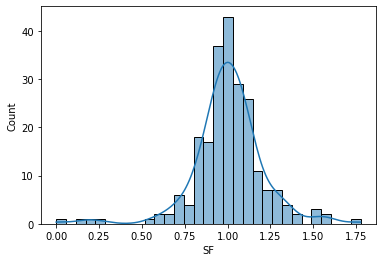

In [29]:
sns.histplot(x=controls2['SF'], kde=True)

Performing shapiro-wilk test for normality

In [26]:
from scipy.stats import shapiro

data = controls2['SF']
data.dropna(inplace=True)
data1 = data.to_numpy()
stat, p = shapiro(data)

print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.905, p=0.000
Sample does not look Gaussian (reject H0)


Histogram appears to show Gaussian distribution, I expect the sahpiro-wilk test is being affected by outliers